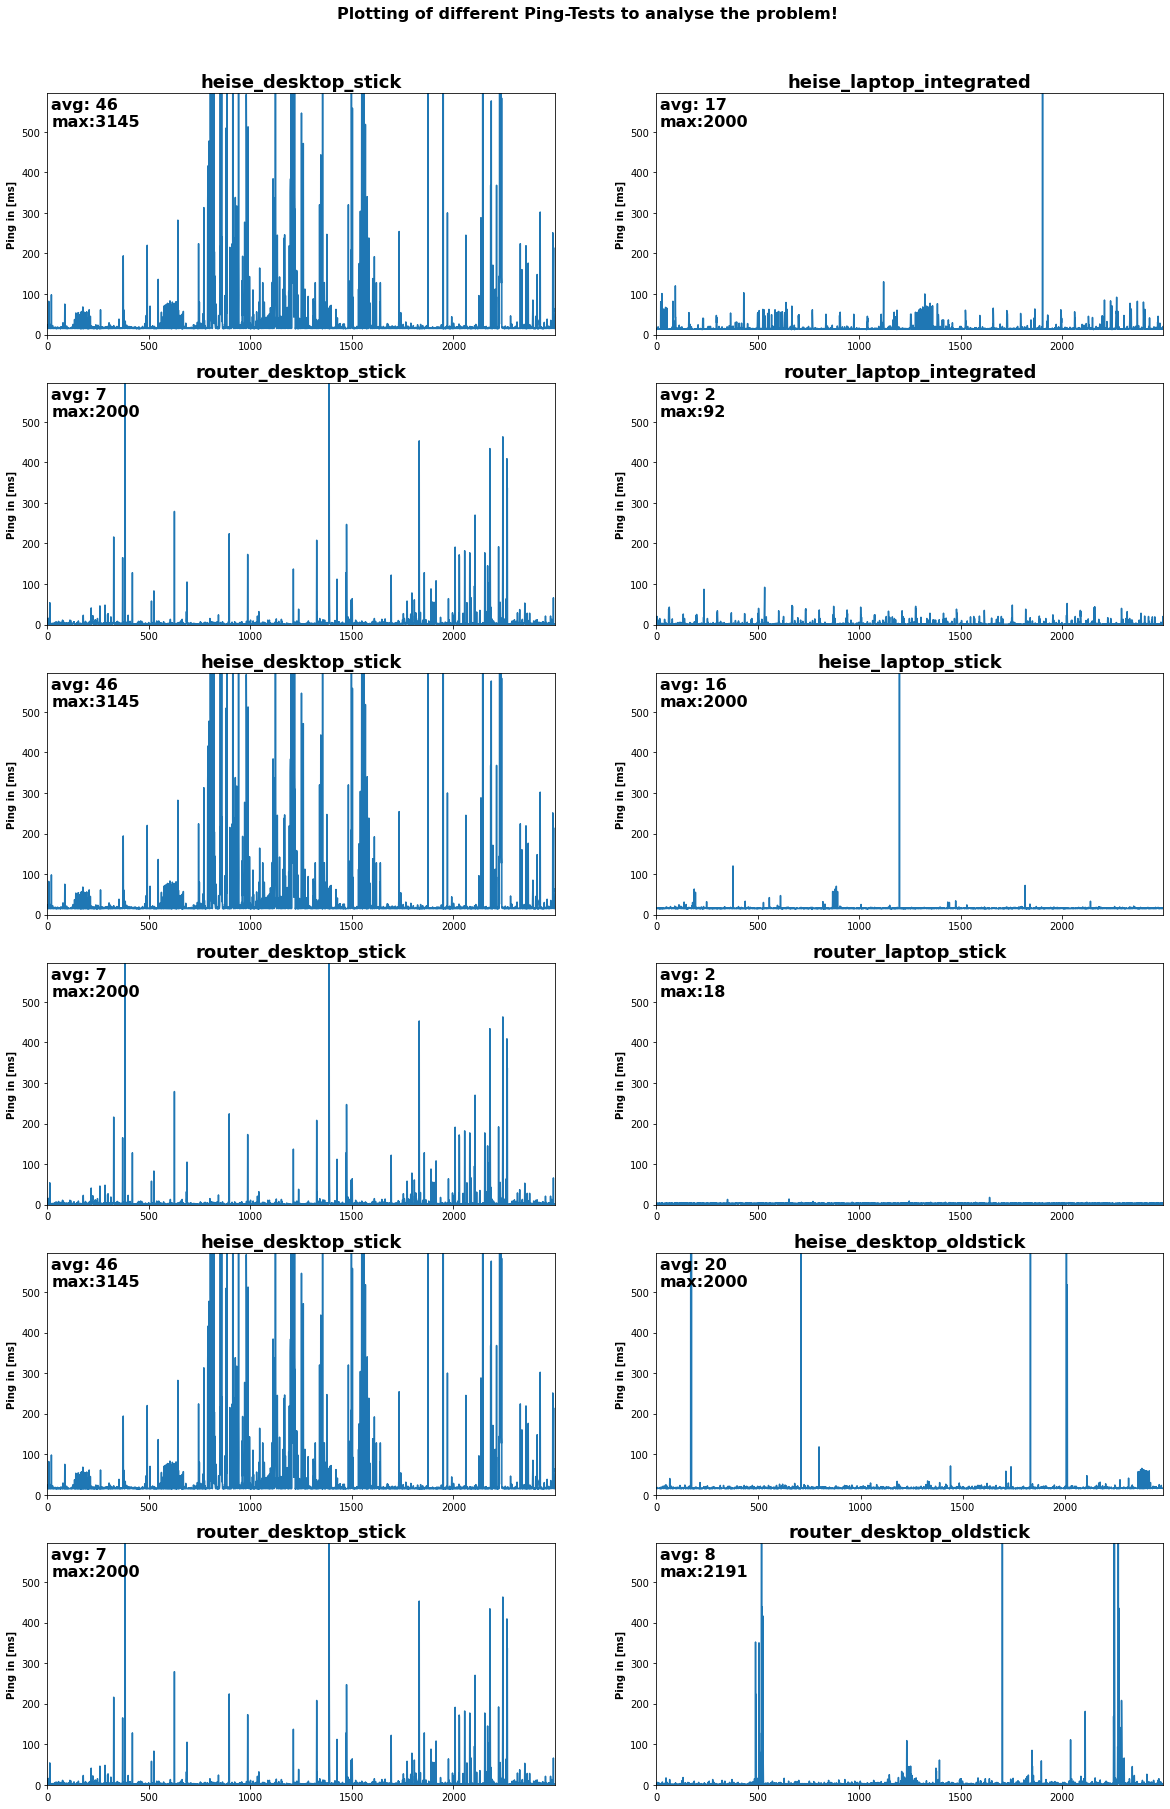

In [2]:
# A simple Script that will analyse and plot the result of the Windows Ping. 
# Only requirement is to write the results into a txt file!
# My cmd-line was: ping -n 'amount' 'target' > 'file_name.txt'

import re
import pandas as pd
import matplotlib.pyplot as plt

# Function that reads the txt File in and creates a DataFrame out of it
def ping(files_names):
    
    df = []
    
    # Looping over all given Files, creating a DataFrame for each File
    for file in file_names:
        file = open(f"ping files\{file}.txt",'r',encoding="utf8",errors="ignore")
        df_file = pd.DataFrame(columns=['Ping'])

        # Looping over every Line, searching for values (betweens Zeit and ms) or Timeouts (containing Anforderung)
        # Adding them to the Dataframe if matched
        for line in file.readlines():
            reg_ms = re.search('Zeit=(.*)ms', line)
            reg_to = re.search('der Anforderung',line)
            
            if reg_ms:
                df_file = df_file.append({'Ping': reg_ms.group(1)},ignore_index=True)
                
            if reg_to:
                df_file = df_file.append({'Ping': 2000},ignore_index=True)
                
        # Converting each DataFrame as Integer and appending the DataFrame into a List called df        
        df_file = df_file.astype(int)
        df.append(df_file)
        
    # Calling the Plot Function with all DataFrames in the List
    plotting(df)
        
        
def plotting(dfs):
    
    count = len(dfs)
    max_value = 0
    
    
    # If only 1 File given, only 1 Plot will be done otherwise they will be compared next to each other
    if count == 1:
        fig, ax = plt.subplots(1)
    else:
        fig, ax = plt.subplots(int(count/2)+(count % 2 >0),2)
    
        
    # Style of the Figure
    fig.set_figwidth(20)
    title = "Plotting of different Ping-Tests to analyse the problem!"
    fig.suptitle(title, fontsize=16,y=count/2+0.3,fontweight="bold")
    fig.subplots_adjust(left=None, bottom=None, right=None, top=(count/2), wspace=None, hspace=None)

    
    # Looping over each DataFrame and extracting the max Value if < 500, Timeouts are given 2000 as Default value
    for df in dfs:
        for i in range(0,len(df)):
            if df['Ping'].iloc[i] > max_value and df['Ping'].iloc[i] < 500:
                max_value = int(df['Ping'].iloc[i] * 1.25)
    
    # Looping over each Dataframe, creating the Box Text (with Avg and max Value), creating the subplots
    # If Condition is needed because the Axis of the Subplots changes when > 3.
    
    # Styling the Subplots: No margins, Ylim = max_value (<500), Title = Filename, Box with average and max value
    if count < 3:
        for i in range(0,count):

            box_text = f"avg: {int(dfs[i]['Ping'].mean())}\nmax:{int(dfs[i]['Ping'].max())}"

            ax[i].margins(0)
            ax[i].set_ylim(0,max_value)
            ax[i].plot(dfs[i])
            ax[i].set_title(file_names[i],fontsize=18, fontweight="bold")
            ax[i].set_ylabel("Ping in [ms]",fontweight="bold")
            ax[i].annotate(
                box_text, 
                (0, 1),
                xytext=(4, -4),
                xycoords='axes fraction',
                textcoords='offset points',
                fontweight='bold',
                fontsize=16,
                ha='left', va='top')
    else:
        for i in range(0,count):
            
            box_text = f"avg: {int(dfs[i]['Ping'].mean())}\nmax:{int(dfs[i]['Ping'].max())}"

            ax[i//2][i%2].margins(0)
            ax[i//2][i%2].set_ylim(0,max_value)
            ax[i//2][i%2].plot(dfs[i])
            ax[i//2][i%2].set_title(file_names[i],fontsize=18, fontweight="bold")
            ax[i//2][i%2].set_ylabel("Ping in [ms]",fontweight="bold")
            ax[i//2][i%2].annotate(
                box_text, 
                (0, 1),
                xytext=(4, -4),
                xycoords='axes fraction',
                textcoords='offset points',
                fontweight='bold',
                fontsize=16,
                ha='left', va='top')
            
# Enter all Files in the /ping files folder to analyse. These are 'imaginary' pairs! The Left will be plotted next to the right File!
file_names = [
    'heise_desktop_stick', 'heise_laptop_integrated',
    'router_desktop_stick', 'router_laptop_integrated',
    'heise_desktop_stick', 'heise_laptop_stick',
    'router_desktop_stick', 'router_laptop_stick',
    'heise_desktop_stick', 'heise_desktop_oldstick',
    'router_desktop_stick', 'router_desktop_oldstick',
]

if __name__ == "__main__":
    ping(file_names)
